In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1) #0~1사이의 난수 발생 
Y = 4 + 3*X + np.random.randn(100, 1)#가우시안 표준 정규분표 발생

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

In [3]:
theta_best

array([[4.12489402],
       [3.0046074 ]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.12489402],
       [10.13410883]])

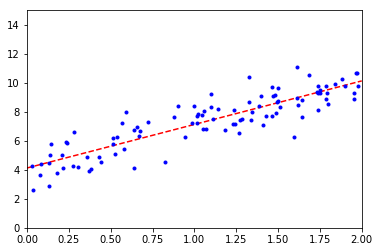

In [8]:
import matplotlib.pyplot as plt 

plt.plot(X_new, y_predict, "r--")
plt.plot(X, Y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, Y)
lin_reg.intercept_,lin_reg.coef_

(array([4.12489402]), array([[3.0046074]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.12489402],
       [10.13410883]])

In [11]:
eta = 0.1 #학습률 
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-Y)
    theta = theta - eta *gradients
theta

array([[4.12489402],
       [3.0046074 ]])

In [9]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = Y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta *gradients
theta

array([[3.58429013],
       [3.35341292]])

In [12]:
from sklearn.linear_model import SGDRegressor 
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1) #epoch, penalty, 학습률
sgd_reg.fit(X, Y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.1345016]), array([3.03509869]))

In [13]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) 

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False) #입력값 X를 다항식으로 변환합니다. 
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([0.19855303, 0.03942331])

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)
lin_reg.intercept_, lin_reg.coef_

(array([1.85856432]), array([[1.01797331, 0.51604368]]))

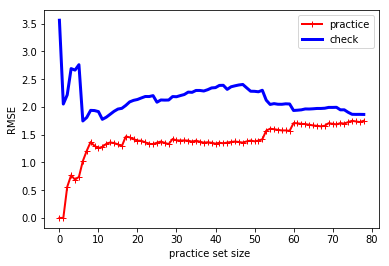

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, Y):
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], Y_train[:m])
        Y_train_predict = model.predict(X_train[:m])
        Y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(Y_train[:m], Y_train_predict))#
        val_errors.append(mean_squared_error(Y_val, Y_val_predict))
    plt.plot(np.sqrt(train_errors), "r+-", linewidth=2, label="practice")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="check")
    plt.legend(loc='upper right')
    plt.xlabel('practice set size ')
    plt.ylabel('RMSE')
    plt.show()

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, Y)

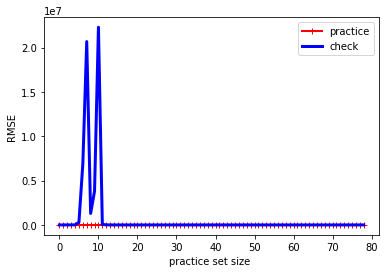

In [17]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, Y)

In [18]:
from sklearn.linear_model import Ridge 

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, Y)
ridge_reg.predict([[1.5]])

array([[4.82858632]])

In [19]:
sdg_reg = SGDRegressor(max_iter=5, penalty="l2")
sgd_reg.fit(X, Y.ravel())
sgd_reg.predict([[1.5]])

array([5.10690907])

In [20]:
from sklearn.linear_model import Lasso 
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, Y)
lasso_reg.predict([[1.5]])

array([4.77427094])

In [21]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,Y)
elastic_net.predict([[1.5]])

array([4.77844632])

In [22]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")#무한대 
best_epoch = None 
best_model = None 

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_predict)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_predict, y_val_predict)
    if val_error <minimum_val_error:
        minimum_val_error = val_error
        best_epoch =epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train' is not defined

In [25]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

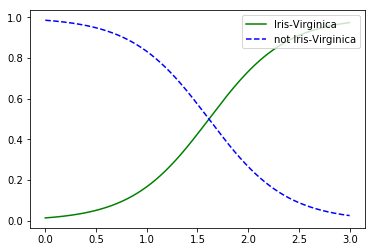

In [32]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)#0출발점  3 도착점 3을 1000 분해해서  
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="not Iris-Virginica")
plt.legend(loc='upper right')
plt.show()

In [34]:
log_reg.predict([[1.5], [1.7]])

array([0, 1])

In [36]:
iris


{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [38]:
X = iris["data"][:, (2, 3)]
Y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, Y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
softmax_reg.predict([[5, 2]])

array([2])